Load the Data

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

matches_df = pd.read_csv("matches.csv")
score_df   = pd.read_csv("deliveries.csv")

matches_df.head(), score_df.head()


(   id  season       city        date                        team1  \
 0   1    2017  Hyderabad  2017-04-05          Sunrisers Hyderabad   
 1   2    2017       Pune  2017-04-06               Mumbai Indians   
 2   3    2017     Rajkot  2017-04-07                Gujarat Lions   
 3   4    2017     Indore  2017-04-08       Rising Pune Supergiant   
 4   5    2017  Bangalore  2017-04-08  Royal Challengers Bangalore   
 
                          team2                  toss_winner toss_decision  \
 0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
 1       Rising Pune Supergiant       Rising Pune Supergiant         field   
 2        Kolkata Knight Riders        Kolkata Knight Riders         field   
 3              Kings XI Punjab              Kings XI Punjab         field   
 4             Delhi Daredevils  Royal Challengers Bangalore           bat   
 
    result  dl_applied                       winner  win_by_runs  \
 0  normal           0          Sunriser

Win Margin Distribution

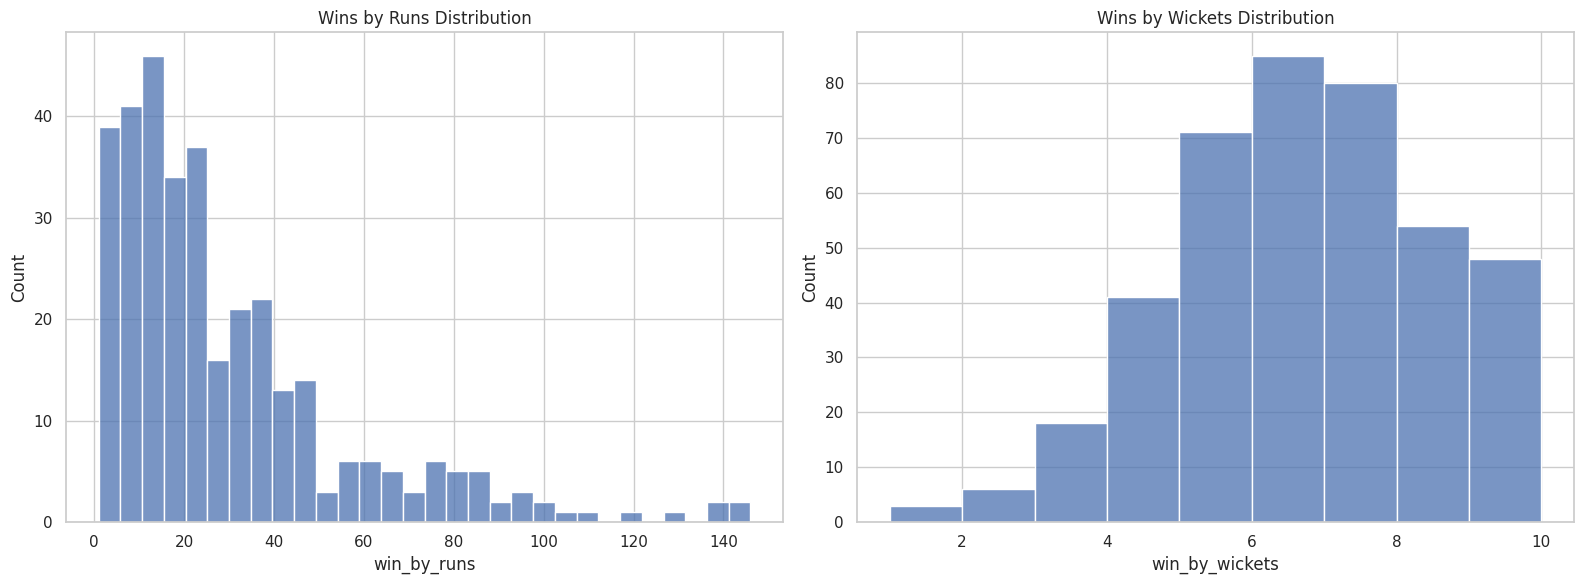

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.histplot(matches_df[matches_df["win_by_runs"]>0]["win_by_runs"], ax=axes[0], bins=30)
axes[0].set_title("Wins by Runs Distribution")

sns.histplot(matches_df[matches_df["win_by_wickets"]>0]["win_by_wickets"], ax=axes[1], bins=9)
axes[1].set_title("Wins by Wickets Distribution")

plt.tight_layout()
plt.show()


Super Over Analysis

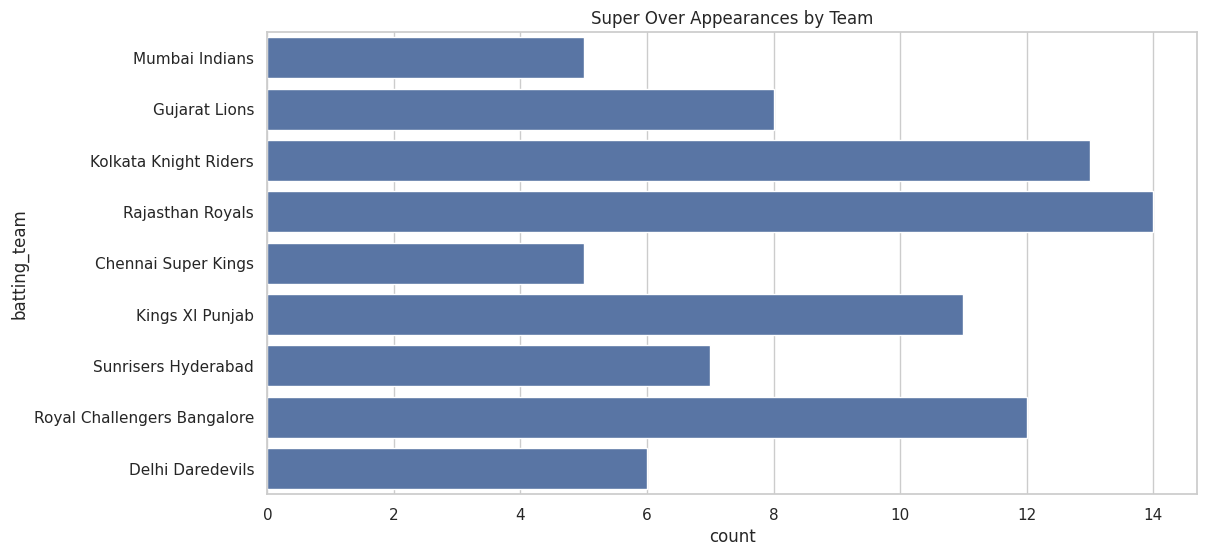

In [14]:
super_df = score_df[score_df["is_super_over"] == 1]

sns.countplot(y="batting_team", data=super_df)
plt.title("Super Over Appearances by Team")
plt.show()


Toss Impact

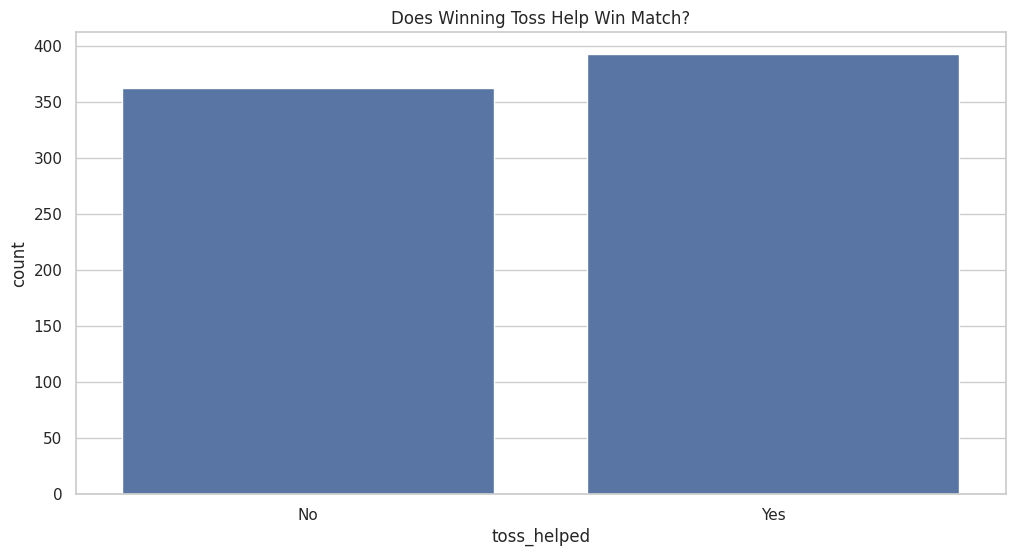

In [15]:
matches_df["toss_helped"] = matches_df["toss_winner"] == matches_df["winner"]

sns.countplot(x="toss_helped", data=matches_df)
plt.xticks([0,1], ['No', 'Yes'])
plt.title("Does Winning Toss Help Win Match?")
plt.show()


Venue Chasing Bias

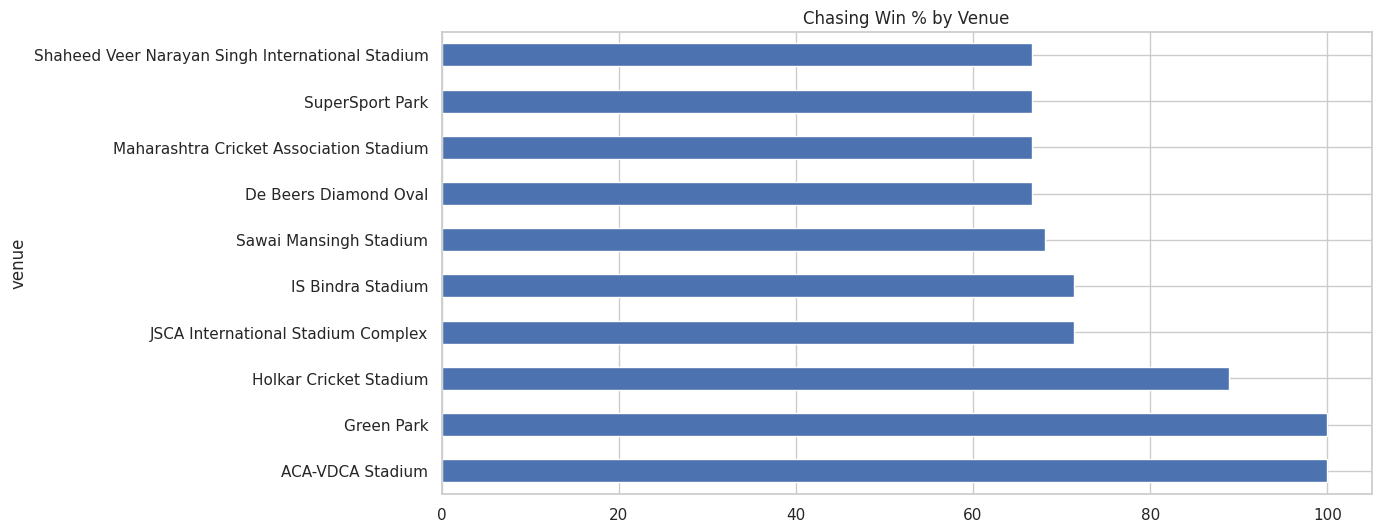

In [16]:
venue_bias = matches_df.groupby("venue")["win_by_wickets"].apply(
    lambda x: (x>0).sum()/len(x) * 100
).sort_values(ascending=False)

venue_bias.head(10).plot(kind="barh")
plt.title("Chasing Win % by Venue")
plt.show()


Team Win % (Consistency)

In [17]:
team_matches = pd.concat([matches_df["team1"], matches_df["team2"]]).value_counts()
team_wins = matches_df["winner"].value_counts()

team_stats = pd.DataFrame({
    "matches": team_matches,
    "wins": team_wins
}).fillna(0)

team_stats["win%"] = (team_stats["wins"] / team_stats["matches"]) * 100
team_stats.sort_values("win%", ascending=False)


,matches,wins,win%
Delhi Capitals,16,10,62.500000
Rising Pune Supergiant,16,10,62.500000
Chennai Super Kings,164,100,60.975610
Mumbai Indians,187,109,58.288770
Sunrisers Hyderabad,108,58,53.703704
Kolkata Knight Riders,178,92,51.685393
Rajasthan Royals,147,75,51.020408
Royal Challengers Bangalore,180,84,46.666667
Kings XI Punjab,176,82,46.590909
Gujarat Lions,30,13,43.333333


Strike Rate (Min 200 Balls)

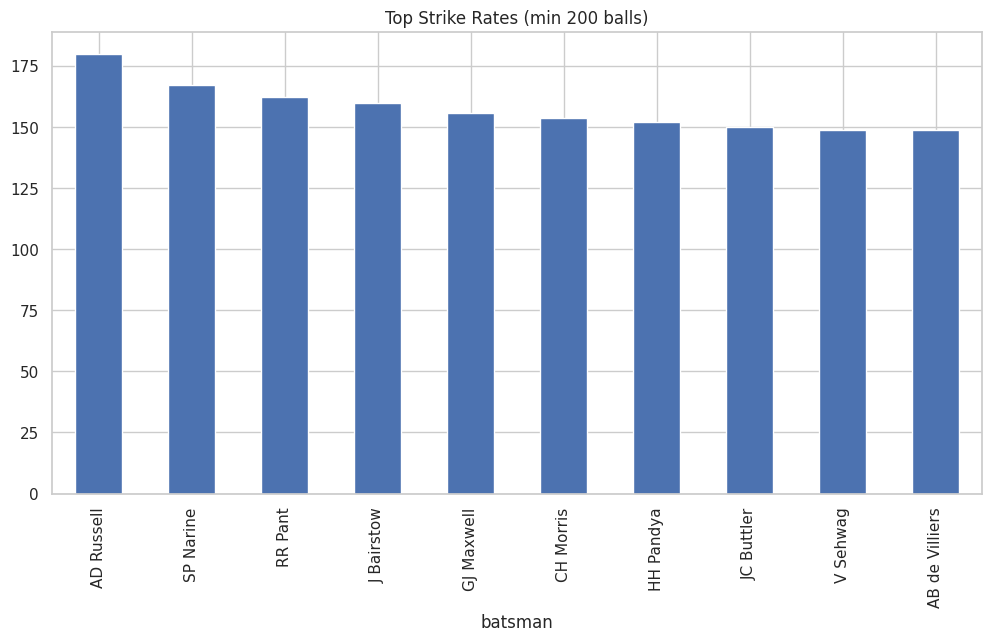

In [20]:
balls = score_df.groupby("batsman")["ball"].count()
runs  = score_df.groupby("batsman")["batsman_runs"].sum()

sr = (runs / balls * 100).dropna()
sr = sr[balls >= 200].sort_values(ascending=False).head(10)

sr.plot(kind="bar", title="Top Strike Rates (min 200 balls)")
plt.show()


Boundary % (4s + 6s)

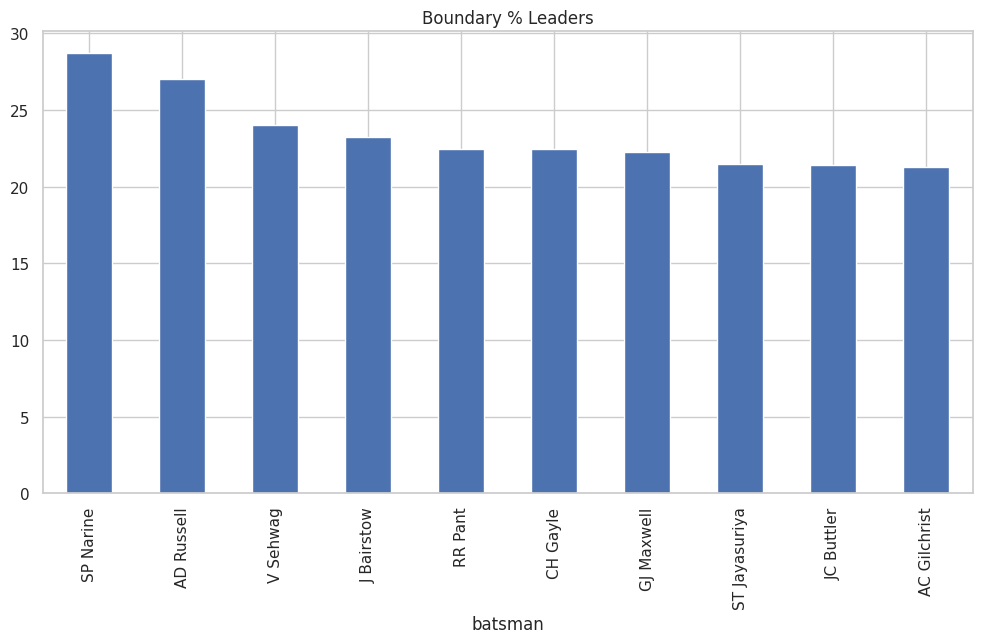

In [21]:
score_df["is_boundary"] = score_df["batsman_runs"].isin([4,6])

boundary_pct = score_df.groupby("batsman")["is_boundary"].mean() * 100
boundary_pct = boundary_pct[score_df.groupby("batsman")["ball"].count() >= 200]

boundary_pct.sort_values(ascending=False).head(10).plot(kind="bar", title="Boundary % Leaders")
plt.show()


Bowler Dot Ball %

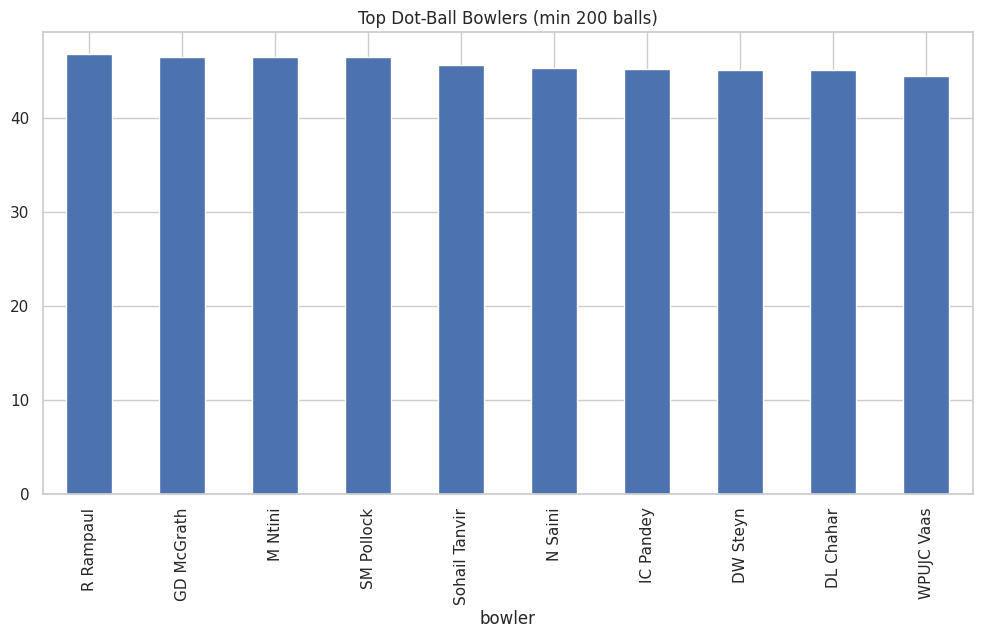

In [22]:
bowler_balls = score_df.groupby("bowler")["ball"].count()
bowler_dots  = score_df.groupby("bowler")["total_runs"].apply(lambda x: (x==0).sum())

dot_pct = (bowler_dots / bowler_balls * 100)
dot_pct = dot_pct[bowler_balls >= 200].sort_values(ascending=False)

dot_pct.head(10).plot(kind="bar", title="Top Dot-Ball Bowlers (min 200 balls)")
plt.show()
